# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 620


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
         
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

#     # Run an API request for each of the cities
    try:
#         # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

#         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tual
Processing Record 2 of Set 1 | st. john's
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | farasan
Processing Record 6 of Set 1 | san julian
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | ilulissat
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | talnakh
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | cockburn town
Processing Record 14 of Set 1 | pisco
Processing Record 15 of Set 1 | padam
City not found. Skipping...
Processing Record 16 of Set 1 | aasiaat
Processing Record 17 of Set 1 | nemuro
Processing Record 18 of Set 1 | rabaul
Processing Record 19 of Set 1 | port mathurin
Processing Record 20 of Set 1 | edinburgh of the seven seas
Processing Record 21 of Set 1 | utrik
Processing Record 22 o

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          594
Lat           594
Lng           594
Max Temp      594
Humidity      594
Cloudiness    594
Wind Speed    594
Country       594
Date          594
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tual,-5.6667,132.7500,29.18,75,100,4.13,ID,1704632985
1,st. john's,47.5649,-52.7093,-8.35,80,26,8.94,CA,1704632986
2,jamestown,42.0970,-79.2353,-0.23,100,100,3.09,US,1704632986
3,puerto natales,-51.7236,-72.4875,10.25,66,75,8.23,CL,1704632987
4,farasan,16.7022,42.1183,26.07,74,35,2.48,SA,1704632987


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tual,-5.6667,132.7500,29.18,75,100,4.13,ID,1704632985
1,st. john's,47.5649,-52.7093,-8.35,80,26,8.94,CA,1704632986
2,jamestown,42.0970,-79.2353,-0.23,100,100,3.09,US,1704632986
3,puerto natales,-51.7236,-72.4875,10.25,66,75,8.23,CL,1704632987
4,farasan,16.7022,42.1183,26.07,74,35,2.48,SA,1704632987


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

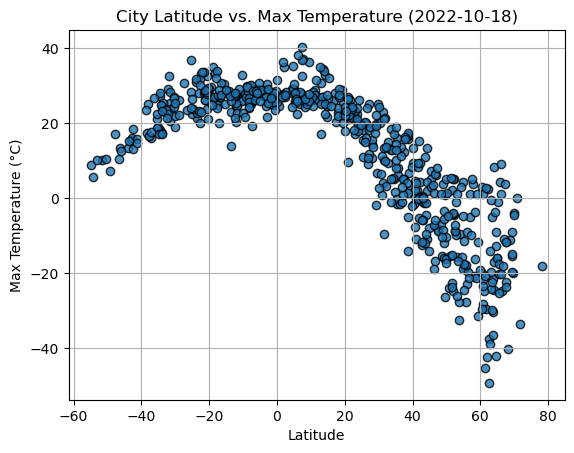

In [49]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors="black", marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

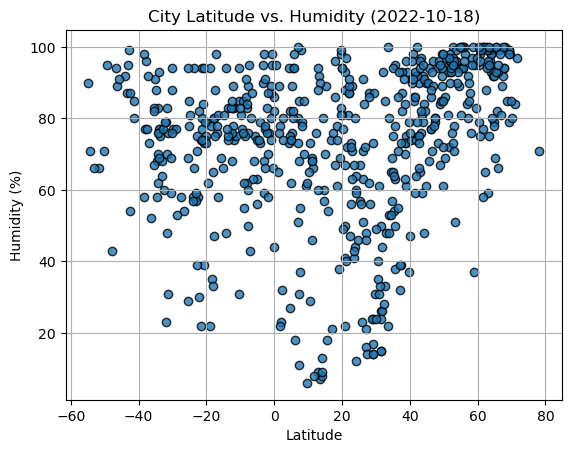

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors="black", marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

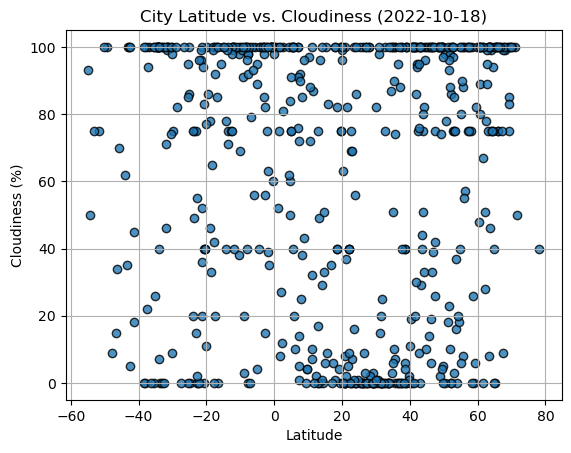

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors="black", marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

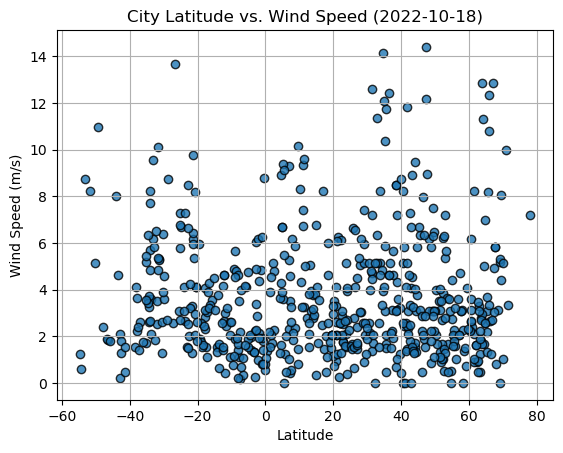

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors="black", marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship

In [41]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x, y, x_label, y_label):
    plt.scatter(x, y, edgecolors='black', alpha=0.8)
    
    # Calculating linear regression statistics
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    # Plotting the regression line
    plt.plot(x, slope*x + intercept, color='red', label=f"y = {slope:.2f}x + {intercept:.2f}")

    # Setting graph properties
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,st. john's,47.5649,-52.7093,-8.35,80,26,8.94,CA,1704632986
2,jamestown,42.0970,-79.2353,-0.23,100,100,3.09,US,1704632986
4,farasan,16.7022,42.1183,26.07,74,35,2.48,SA,1704632987
5,san julian,21.0167,-102.1667,9.49,67,100,2.04,MX,1704632988
8,ilulissat,69.2167,-51.1000,-8.99,79,75,0.00,GL,1704632989


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tual,-5.6667,132.7500,29.18,75,100,4.13,ID,1704632985
3,puerto natales,-51.7236,-72.4875,10.25,66,75,8.23,CL,1704632987
6,port-aux-francais,-49.3500,70.2167,7.16,95,100,10.95,TF,1704632988
7,grytviken,-54.2811,-36.5092,5.68,71,50,0.61,GS,1704632989
9,bredasdorp,-34.5322,20.0403,17.98,68,100,3.61,ZA,1704632990


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:-0.8750937960002687


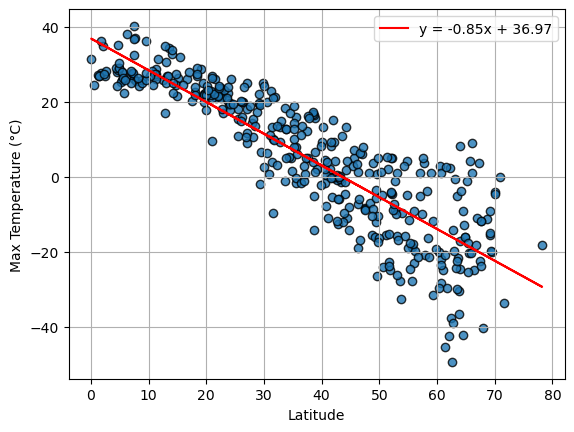

In [42]:
# Linear regression on Northern Hemisphere
# Creating variables for x, y values
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Calculating correlation coefficient
r_value = np.corrcoef(x_values, y_values)[0, 1]

# Printing the r-value
print(f"The r-value is:{r_value}")

# Calling Linear Regression Plot function
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],'Latitude', 'Max Temperature (°C)')


The r-value is:0.6366652826508131


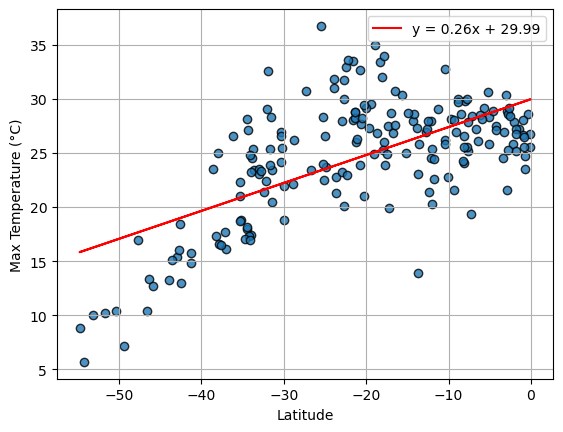

In [27]:
# Linear regression on Southern Hemisphere
# Creating variables for x, y values
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Calculating correlation coefficient
r_value = np.corrcoef(x_values, y_values)[0, 1]

# Printing the r-value
print(f"The r-value is:{r_value}")

# Calling Linear Regression Plot function
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],'Latitude', 'Max Temperature (°C)')

**Discussion about the linear relationship:** 
Linear relationship between Northern and Southern Hemisphere based on the Temperature vs. Latitude Linear Regression Plots:

Northern Hemisphere: y = -0.85x + 36.97
The slope in this equation is -0.85 and this negative value indicates a negative correlation between x and y. 
As x increases, y in turn decreases, and vice versa. The y-intercept is 36.97 and it represents the value of 
y when x is zero. The negative slope indicates a negative linear relationship. The extent of the slope (-0.85) 
demonstrates a moderate strength for the negative correlation.

Southern Hemisphere: y = 0.26x + 29.99
The slope in this equation is 0.26 and this positive value suggests a positive correlation between x and y. 
As x increases, y is expected to increase, and conversely as y increases, so will x. The y-intercept is 29.99. 
Like in the Northern Hemisphere equation, it represents the value of y when x is zero. The positive slope points 
to a positive linear relationship. The range of the slope (0.26) drives at a relatively weak strength for the positive correlation.

The first r-value (-0.88) indicates a stronger negative correlation compared to the second r-value (0.64).
The negative r-value demonstrates an inverse relationship where one variable decreases as the other increases, while the positive 
r-value suggests a direct relationship where both variables tend to increase together. The importance of the 
r-value gives insights into the strength of the linear relationship. In this case, -0.88 is considered strong, and 0.64 is considered moderate.


### Humidity vs. Latitude Linear Regression Plot

The r-value is:0.45479160292007864


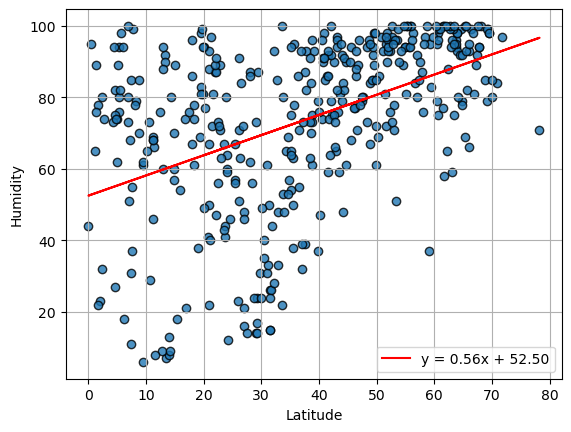

In [43]:
# Northern Hemisphere
# Creating variables for x, y values
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Calculating correlation coefficient
r_value = np.corrcoef(x_values, y_values)[0, 1]

# Printing the r-value
print(f"The r-value is:{r_value}")

# Calling Linear Regression Plot function
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],'Latitude', 'Humidity')

The r-value is:0.019403593930982597


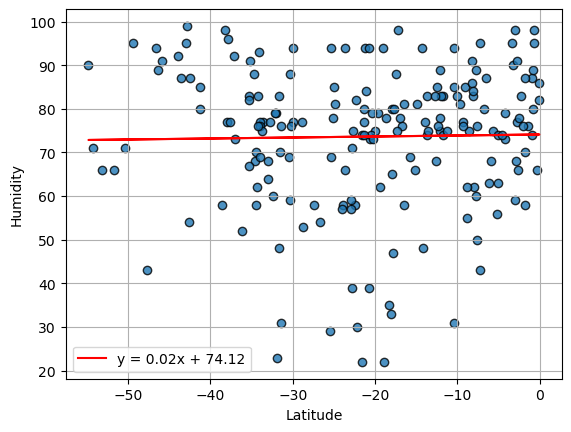

In [44]:
# Southern Hemisphere
# Creating variables for x, y values
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Calculating correlation coefficient
r_value = np.corrcoef(x_values, y_values)[0, 1]

# Printing the r-value
print(f"The r-value is:{r_value}")

# Calling Linear Regression Plot function
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],'Latitude', 'Humidity')

**Discussion about the linear relationship:** 
Linear relationship between Northern and Southern Hemisphere based on the Humidity vs. Latitude Linear Regression Plots:

Northern Hemisphere: y = 0.56x + 52.50
The slope in this equation is 0.56 and this positive slope shows a positive linear relationship between 
x and y. As x increases, y is should also increase. The y-intercept is 52.50 and it represents the value of 
y when x is zero. The positive slope suggests a positive linear relationship. The range of the slope (0.56) indicates 
a moderate strength for the positive correlation.

Southern Hemisphere: y = 0.02x + 74.12
The slope in this equation is 0.02 and this positive slope also points to a positive linear relationship between 
x and y. Though, the slope is much smaller compared to the first linear regression plot, suggesting a slighter increase in 
y as x increases. As x increases, y is expected to increase at a much smaller rate of 0.02 units per unit increase in x. 
This is a positive relationship, but as seen in the plot the slope is virtually flat. The scale of the slope (0.02) drives 
at a relatively weak strength for the positive correlation.

The first r-value (0.45) suggests a moderate positive correlation, indicating a noticeable relationship between the two variables.
The second r-value (0.02) indicates a very weak positive correlation, indicating a miniscule or almost negligible relationship 
between the two variables. The strength of the correlation is significantly different between the two cases. The importance of the 
r-value gives us a view into the strength of the linear relationship. In this case, 0.45 is considered moderately strong, and 0.02 is considered unvarying.




### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.23955310269509733


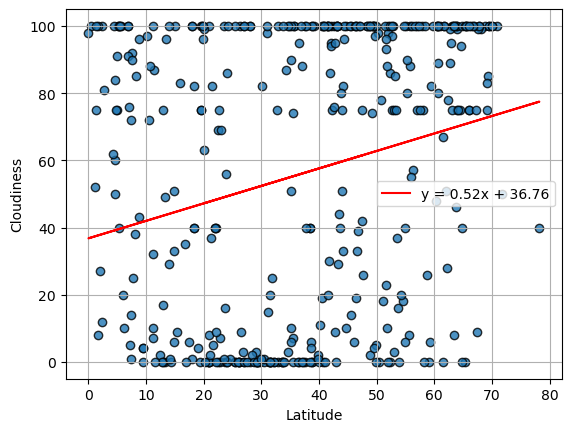

In [45]:
# Northern Hemisphere
# Creating variables for x, y values
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Calculating correlation coefficient
r_value = np.corrcoef(x_values, y_values)[0, 1]

# Printing the r-value
print(f"The r-value is:{r_value}")

# Calling Linear Regression Plot function
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],'Latitude', 'Cloudiness')

The r-value is:0.1694748626199117


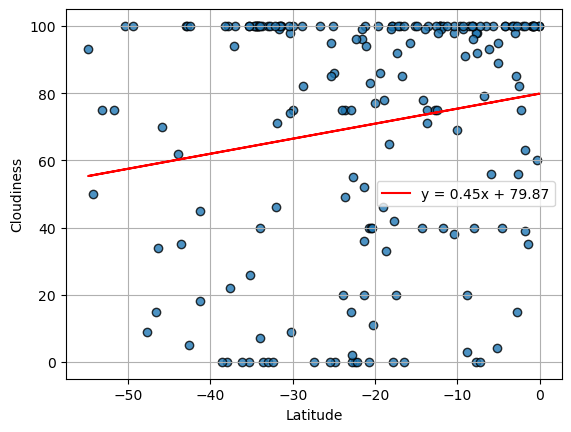

In [46]:
# Southern Hemisphere
# Creating variables for x, y values
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Calculating correlation coefficient
r_value = np.corrcoef(x_values, y_values)[0, 1]

# Printing the r-value
print(f"The r-value is:{r_value}")

# Calling Linear Regression Plot function
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],'Latitude', 'Cloudiness')

**Discussion about the linear relationship:** 
Linear relationship between Northern and Southern Hemisphere based on the Cloudiness vs. Latitude Linear Regression Plots:

Northern Hemisphere: y = 0.52x + 36.76
The slope in this equation is 0.52 and this positive slope shows a positive linear relationship between 
x and y. As x increases, y is should also increase. The y-intercept is 36.76 and it shows the value of 
y when x is zero. The positive slope suggests a positive linear relationship. The range of the slope (0.52) indicates 
a moderate strength for the positive correlation.

Southern Hemisphere: y = 0.45x + 79.87
The slope in this equation is 0.45 and this positive value suggests a positive correlation between x and y. 
As x increases, y is expected to increase, and vice versa. The y-intercept is 79.87. Like in the Northern Hemisphere equation, 
it represents the value of y when x is zero. The positive slope points to a positive linear relationship. 
The range of the slope (0.45) indicates a relatively moderate strength for the positive correlation. The first equation (0.52x + 36.76) 
has a slightly larger slope, pointing to a relatively stronger positive correlation compared to the second equation (0.45x + 79.87)

Both r-values indicate positive correlations, meaning that as one variable increases, the other tends to increase.
The first r-value (0.24) suggests a weak positive correlation, while the second r-value (0.17) suggests an even weaker positive correlation.
The strength of the correlation is notably different between the two cases, with the first case showing a slightly stronger positive correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:0.012495897994838535


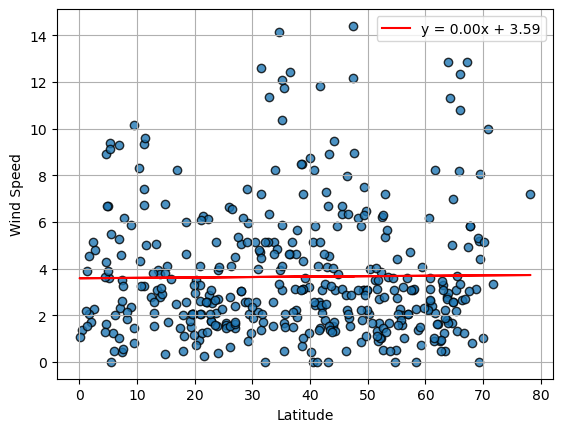

In [47]:
# Northern Hemisphere
# Creating variables for x, y values
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Calculating correlation coefficient
r_value = np.corrcoef(x_values, y_values)[0, 1]

# Printing the r-value
print(f"The r-value is:{r_value}")

# Calling Linear Regression Plot function
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],'Latitude', 'Wind Speed')

The r-value is:-0.2502681221416952


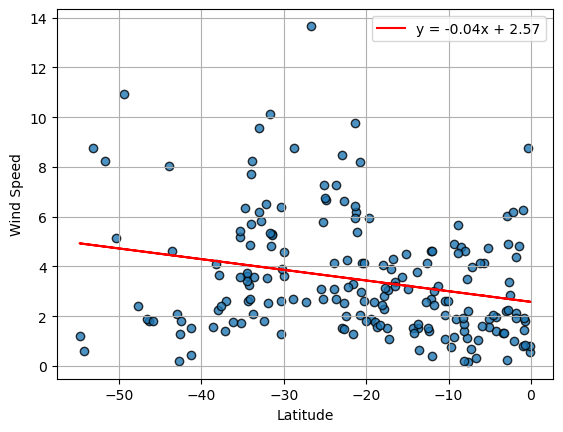

In [48]:
# Southern Hemisphere
# Creating variables for x, y values
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Calculating correlation coefficient
r_value = np.corrcoef(x_values, y_values)[0, 1]

# Printing the r-value
print(f"The r-value is:{r_value}")

# Calling Linear Regression Plot function
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],'Latitude', 'Wind Speed')

**Discussion about the linear relationship:** 
Linear relationship between Northern and Southern Hemisphere based on the Wind Speed vs. Latitude Linear Regression Plots:

Northern Hemisphere: y = 0.00x + 3.59
The slope in this equation is 0.00 indicating no change in y with respect to changes in x.
The y-intercept is 3.59, meaning that when x is zero, y is 3.59. This equation suggests a constant value for y, 
regardless of the value of x. This is basically a horizontal line parallel to the x-axis, where y does not change with x.
This might indicate a scenario where x does not influence y. 

Southern Hemisphere: y = -0.04x + 2.57
The slope in this equation is -0.04 suggesting a negative linear relationship between x and y.
As x increases, y in turn decreases, and conversely as y increases, x decreases. The y-intercept is 2.57 
and it represents the value of y when x is zero. The negative slope indicates a negative linear relationship. The extent of the slope (-0.04) 
demonstrates a very small strength for the negative correlation.

The first r-value (0.0125) suggests an extremely weak positive correlation, and the second r-value (-0.25) 
suggests a weak negative correlation. To summarize, the r-values indicate weak correlations, with the first 
r-value suggesting an exceedingly weak positive correlation and the second r-value suggesting a highly weak negative correlation. 
The strength of the correlations is relatively low in both cases.